In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import h5py
import pandas as pd
from scipy import signal

In [2]:
path = 'data/los/los_20230321.001.h5'

lons = [19, 32]
lats = [59, 71]


In [3]:
def get_all(name):
   print(name)

with h5py.File(path, 'r') as f:
   #f.visit(get_all)

   print(f['Metadata']['Data Parameters'][()]) # type: ignore

[(b'YEAR', b'Year (universal time)', 0, b'y', b'Madrigal Hdf5 Prolog Parameters')
 (b'MONTH', b'Month (universal time)', 0, b'm', b'Madrigal Hdf5 Prolog Parameters')
 (b'DAY', b'Day (universal time)', 0, b'd', b'Madrigal Hdf5 Prolog Parameters')
 (b'HOUR', b'Hour (universal time)', 0, b'h', b'Madrigal Hdf5 Prolog Parameters')
 (b'MIN', b'Minute (universal time)', 0, b'm', b'Madrigal Hdf5 Prolog Parameters')
 (b'SEC', b'Second (universal time)', 0, b's', b'Madrigal Hdf5 Prolog Parameters')
 (b'RECNO', b'Logical Record Number', 0, b'N/A', b'Madrigal Hdf5 Prolog Parameters')
 (b'KINDAT', b'Kind of data', 0, b'N/A', b'Madrigal Hdf5 Prolog Parameters')
 (b'KINST', b'Instrument Code', 0, b'N/A', b'Madrigal Hdf5 Prolog Parameters')
 (b'UT1_UNIX', b'Unix seconds (1/1/1970) at start', 0, b's', b'Madrigal Hdf5 Prolog Parameters')
 (b'UT2_UNIX', b'Unix seconds (1/1/1970) at end', 0, b's', b'Madrigal Hdf5 Prolog Parameters')
 (b'PIERCE_ALT', b'Pierce Point Altitude', 0, b'km', b'Geographic Coordin

In [4]:
with h5py.File(path, 'r') as f:
    # Access the dataset
        
    dset = f['Data']['Table Layout']

    filtered_data = dset[(dset['gdlonr'] >= min(lons)) & (dset['gdlonr'] <= max(lons)) 
                         & (dset['gdlatr'] >= min(lats)) & (dset['gdlatr'] <= max(lats))]

    

In [5]:
df = pd.DataFrame(filtered_data)

df['minute'] = df['min']
df['second'] = df['sec']
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])
df = df[['datetime', 'gps_site', 'sat_id', 'gdlatr', 'gdlonr', 'los_tec', 'tec', 'azm', 'elm', 'gdlat', 'glon', 'gnss_type']]

df['slant_f'] = 1+16*(0.53-df['elm']/180)**3
df['vtec'] = df['los_tec']/df['slant_f']

df['pair_id'] = df['gnss_type'].astype(str) + df['gps_site'].astype(str) + df['sat_id'].astype(str)

df

,datetime,gps_site,sat_id,gdlatr,gdlonr,los_tec,tec,azm,elm,gdlat,glon,gnss_type,slant_f,vtec,pair_id
0,2023-03-21 00:00:00,b'0ams',1,64.532524,19.349890,7.319108,6.757187,-93.695259,66.141273,64.409019,16.322577,b'GLONASS ',1.068718,6.848495,GLONASS 0ams1
1,2023-03-21 00:00:00,b'0ams',2,64.532524,19.349890,17.525944,6.324103,-95.240273,10.974367,61.708618,-3.123620,b'GLONASS ',2.650918,6.611274,GLONASS 0ams2
2,2023-03-21 00:00:00,b'0ams',3,64.532524,19.349890,5.837809,3.747042,127.889969,36.178402,61.966934,25.912123,b'GPS ',1.569827,3.718760,GPS 0ams3
3,2023-03-21 00:00:00,b'0ams',4,64.532524,19.349890,6.225074,5.995864,141.465408,73.560059,63.833977,20.586426,b'GPS ',1.028580,6.052107,GPS 0ams4
4,2023-03-21 00:00:00,b'0ams',6,64.532524,19.349890,7.118649,5.757795,-103.655869,51.757710,63.888821,14.246412,b'GPS ',1.228047,5.796722,GPS 0ams6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8085267,2023-03-21 23:59:30,b'ylit',19,66.306602,23.667742,25.151558,11.009525,-9.048140,18.839087,73.481216,19.635979,b'GLONASS ',2.231186,11.272729,GLONASS ylit19
8085268,2023-03-21 23:59:30,b'ylit',26,66.306602,23.667742,12.014392,5.850308,75.738892,23.160782,67.073586,39.156425,b'GPS ',2.034241,5.906082,GPS ylit26
8085269,2023-03-21 23:59:30,b'ylit',28,66.306602,23.667742,22.285383,7.829966,35.898548,9.762112,73.973198,47.689735,b'GPS ',2.723060,8.183950,GPS ylit28
8085270,2023-03-21 23:59:30,b'ylit',29,66.306602,23.667742,23.818161,8.448826,10.967796,10.204763,76.757698,32.617683,b'GPS ',2.696479,8.833061,GPS ylit29


In [6]:
def calculate_time_diff(group):
    time_diff = group['datetime'].diff().dt.total_seconds()
    new_group = time_diff.gt(300).cumsum()
    group['curve_id'] = new_group
    return group

# Apply the function to each group defined by the index
df = df.groupby('pair_id').apply(calculate_time_diff)
df.reset_index(inplace=True, drop=True)
df

C:\Users\virtanem\AppData\Local\Temp\ipykernel_17432\2362463984.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('pair_id').apply(calculate_time_diff)


,datetime,gps_site,sat_id,gdlatr,gdlonr,los_tec,tec,azm,elm,gdlat,glon,gnss_type,slant_f,vtec,pair_id,curve_id
0,2023-03-21 00:00:00,b'0ams',1,64.532524,19.349890,7.319108,6.757187,-93.695259,66.141273,64.409019,16.322577,b'GLONASS ',1.068718,6.848495,GLONASS 0ams1,0
1,2023-03-21 00:00:30,b'0ams',1,64.532524,19.349890,7.559455,7.005074,-93.473663,66.691986,64.417694,16.399038,b'GLONASS ',1.064910,7.098679,GLONASS 0ams1,0
2,2023-03-21 00:01:30,b'0ams',1,64.532524,19.349890,7.706900,7.154760,-93.358940,66.967659,64.422279,16.442909,b'GLONASS ',1.063058,7.249745,GLONASS 0ams1,0
3,2023-03-21 00:02:00,b'0ams',1,64.532524,19.349890,7.740303,7.198741,-93.241463,67.243530,64.426292,16.475420,b'GLONASS ',1.061240,7.293639,GLONASS 0ams1,0
4,2023-03-21 00:02:30,b'0ams',1,64.532524,19.349890,7.669321,7.158023,-92.997871,67.795799,64.434814,16.551697,b'GLONASS ',1.057707,7.250894,GLONASS 0ams1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8085267,2023-03-21 23:57:00,b'ylit',9,66.306602,23.667742,9.515786,7.572054,-132.467819,50.392902,64.604004,19.501953,b'GPS ',1.250118,7.611908,GPS ylit9,2
8085268,2023-03-21 23:57:30,b'ylit',9,66.306602,23.667742,9.618620,7.675449,-132.512192,50.624043,64.611526,19.524801,b'GPS ',1.246285,7.717836,GPS ylit9,2
8085269,2023-03-21 23:58:00,b'ylit',9,66.306602,23.667742,9.746588,7.821429,-132.609863,51.090988,64.638084,19.597088,b'GPS ',1.238659,7.868658,GPS ylit9,2
8085270,2023-03-21 23:59:00,b'ylit',9,66.306602,23.667742,9.640309,7.757446,-132.659317,51.321877,64.656937,19.645588,b'GPS ',1.234948,7.806247,GPS ylit9,2


In [7]:
idlist = list(df['pair_id'].unique())

df.loc[(df['pair_id'] == idlist[3])]['curve_id'].unique()

array([0, 1])

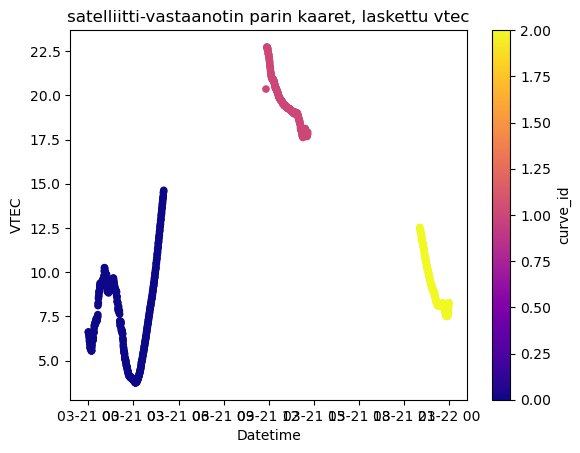

In [8]:
id = 10

df2 = df.loc[df['pair_id'] == idlist[id]]

df2.plot('datetime', 'vtec', 'scatter', c='curve_id', colormap='plasma')
plt.xlabel('Datetime')
plt.ylabel('VTEC')
plt.title('satelliitti-vastaanotin parin kaaret, laskettu vtec')
plt.show()

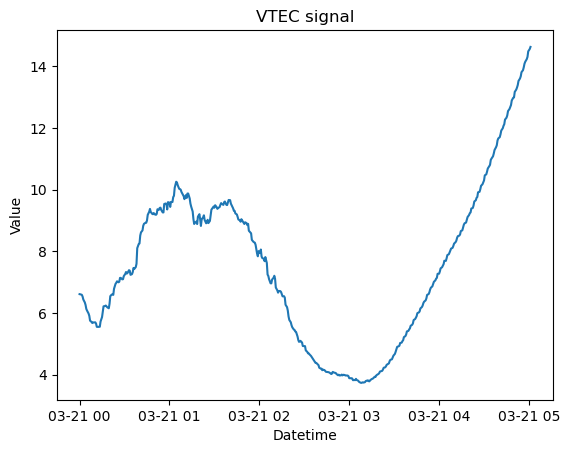

In [9]:
df3 = df2.loc[df2['curve_id'] == 0]

# Plot both lines on the same plot
plt.plot(df3['datetime'], df3['vtec'], label='VTEC')

# Add labels and legend
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('VTEC signal')

# Show the plot
plt.show()


C:\Users\virtanem\AppData\Local\Temp\ipykernel_17432\1951046800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['filtered'] = signal.savgol_filter(df3['vtec'], window_length=60,


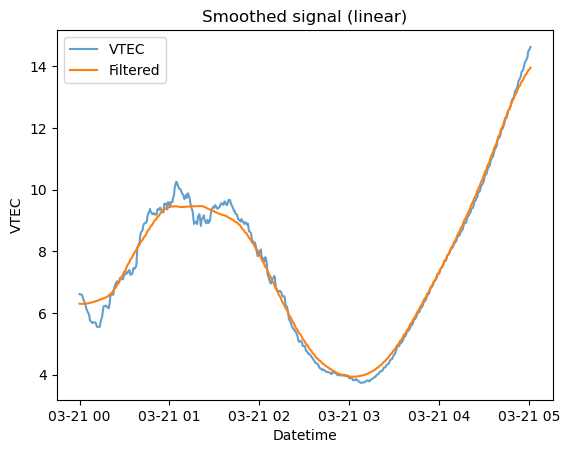

In [10]:
df3['filtered'] = signal.savgol_filter(df3['vtec'], window_length=60, 
                                       polyorder=1, mode="nearest")

# Plot both lines on the same plot
plt.plot(df3['datetime'], df3['vtec'], alpha=0.7, label='VTEC')
plt.plot(df3['datetime'], df3['filtered'], label='Filtered')

# Add labels and legend
plt.xlabel('Datetime')
plt.ylabel('VTEC')
plt.legend()
plt.title('Smoothed signal (linear)')

# Show the plot
plt.show()

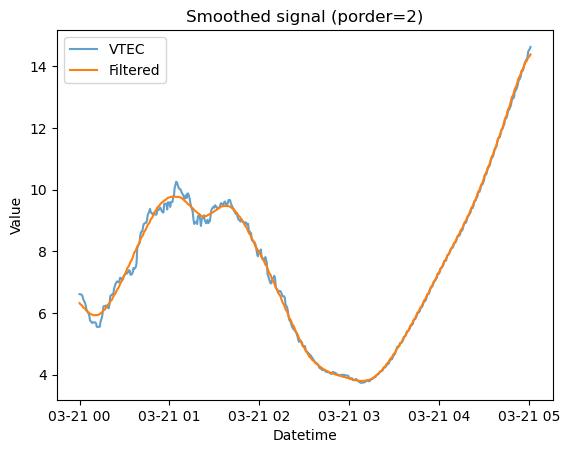

In [11]:
df4 = df3.copy()
df4['filtered'] = signal.savgol_filter(df4['vtec'], window_length=60, 
                                       polyorder=2, mode="nearest")

# Plot both lines on the same plot
plt.plot(df3['datetime'], df4['vtec'], alpha=0.7, label='VTEC')
plt.plot(df3['datetime'], df4['filtered'], label='Filtered')

# Add labels and legend
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.legend()
plt.title('Smoothed signal (porder=2)')

# Show the plot
plt.show()

In [12]:
df3['blrmvd'] = df3['vtec'] - df3['filtered']

C:\Users\virtanem\AppData\Local\Temp\ipykernel_17432\3405999280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['blrmvd'] = df3['vtec'] - df3['filtered']


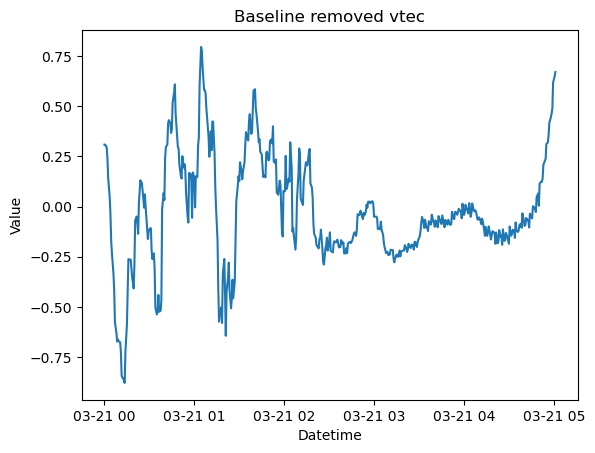

In [13]:
plt.plot(df3['datetime'], df3['blrmvd'])

# Add labels and legend
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Baseline removed vtec')

# Show the plot
plt.show()

In [14]:
df['filtered'] = signal.savgol_filter(df['vtec'], window_length=60, 
                                       polyorder=1, mode="nearest")
df['blrmvd'] = df['vtec'] - df['filtered']

df.to_csv('data/kaari2132023.csv', index=False)
